In [3]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('.')

In [4]:
import itertools

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd


from src.dsep import dataset
from src.dsep import utils

# Homework (part 2)
Implement function for checking whether two random variables are d-separable given some observations. You can use `networkx` for graph related functions (generation of paths between nodes, checking if there is an edge between nodes etc.).

In [5]:
def is_head_head(G,v1,v2,v):
    return v in graph.neighbors(v1) and v in graph.neighbors(v2)
            
def is_head_tail(G,v1,v2,v):
    return v in graph.neighbors(v1) and v2 in graph.neighbors(v)

def is_tail_tail(G,v1,v2,v):
    return v1 in graph.neighbors(v) and v2 in graph.neighbors(v)

def is_d_separable(G, v1, v2, C):  # Implement
    """Checks if v1 and v2 are d-separable given C.
    
    If d-separation is not applicable return 'N/A',
    otherwise return True/False, whether variables
    are d-separable or not.
    """
    
    undirected = G.to_undirected()
    paths = list(nx.all_simple_paths(undirected, source=v1, target=v2))
    
    for path in paths:
        if len(path) < 3:
            return 'N/A'
    
    for v in C:
        if v in [v1,v2]:
            return 'N/A'
    
    segmented_paths = [ [path[i:i+3] for i in range(len(path)-2) ] for path in paths ]
    
    for segmented_path in segmented_paths:
        blocked = False
        for s in segmented_path:
            sv1,v,sv2 = s
            
            if is_head_head(G,v1,v2,v) and v not in C and len(list(nx.all_simple_paths(G,v,C))) == 0:
                blocked = True
                break
                
            for v in C:
                if is_tail_tail(G,sv1,sv2,v) or is_head_tail(G,sv1,sv2,v) or is_head_tail(G,sv2,sv1,v):
                    blocked = True
                    break
        
        if blocked == False:
            return False
        
    return True

## Example PGM and observed variable
Gray nodes are observed and belong to the conditioning set.

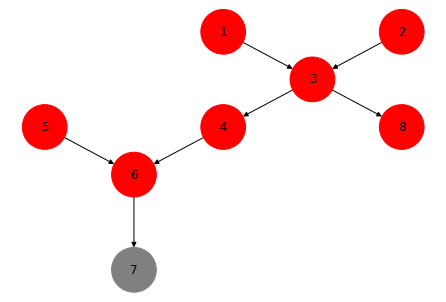

In [6]:
graph, node_pos = dataset.get_graph('first')
conditioning_set = {7}

dataset.visualize(G=graph, C=conditioning_set, node_pos=node_pos)

## Check D-Separability for all variable pairs

In [7]:
df = utils.check_d_separability_for_all_node_pairs(
    G=graph,
    C=conditioning_set,
    d_sep_fn=is_d_separable,
)

In [8]:
df[df.d_sep == True]

,v1,v2,d_sep


In [9]:
df[df.d_sep == 'N/A']

,v1,v2,d_sep
1,1,3,N/A
5,1,7,N/A
8,2,3,N/A
12,2,7,N/A
14,3,1,N/A
15,3,2,N/A
16,3,4,N/A
19,3,7,N/A
20,3,8,N/A
23,4,3,N/A


In [10]:
df[df.d_sep == False]

,v1,v2,d_sep
0,1,2,False
2,1,4,False
3,1,5,False
4,1,6,False
6,1,8,False
7,2,1,False
9,2,4,False
10,2,5,False
11,2,6,False
13,2,8,False


## Tests for checking validity of implementation

In [11]:
utils.check(
    graph=dataset.get_graph('first')[0],
    conditioning_set={7},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-first-c7.pkl',
)

No errors found! Passed


In [12]:
utils.check(
    graph=dataset.get_graph('first')[0],
    conditioning_set={3, 7},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-first-c37.pkl',
)

No errors found! Passed


In [13]:
utils.check(
    graph=dataset.get_graph('second')[0],
    conditioning_set={6},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-second-c6.pkl',
)

No errors found! Passed


In [14]:
utils.check(
    graph=dataset.get_graph('second')[0],
    conditioning_set={3, 6},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-second-c36.pkl',
)

No errors found! Passed
